In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


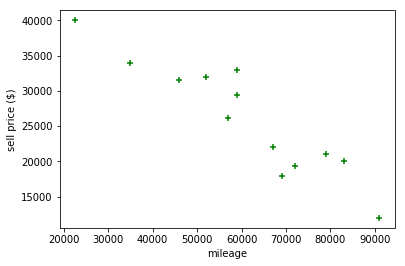

In [9]:
%matplotlib inline
plt.xlabel('mileage')
plt.ylabel('sell price ($)')
plt.scatter(df.Mileage, df['Sell Price($)'], color='green', marker='+')

In [10]:
# As we can see, the sell price is going down as mileage is increasing
# we can see that Linear Regression Model would fit into this pretty well


In [11]:
# let's do this exercise first, without using sklearn 
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [14]:
#merge this dummies data frame into our previous data frame df
merged = pd.concat([df, dummies], axis='columns')
# Also need to drop Car Model column as we don't need it now
# plus we need to drop one dummy variable 
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [16]:
# After finishing with data munging let's get our featurer X
X = final.drop(['Sell Price($)'], axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [17]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [18]:
# now let's train our model using skLearn linear regression model first
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#let's make prediction as per the exercise 
# predict price of mercedez benz that is 4 yr old with mileage 45000
model.predict([[45000, 4, 0, 0]])

array([36991.31721061])

In [20]:
#predict price of BMW x5 that is 7 yr old with mileage 86000
model.predict([[86000, 7, 0, 1]])

array([11080.74313219])

In [22]:
# score of our model 
model.score(X,y)

0.9417050937281083

In [23]:
## Let's solve the same problem using skLearn preprocessing 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
dfle = df
dfle['Car Model'] = le.fit_transform(df['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [29]:
X_ = dfle.drop(['Sell Price($)'], axis='columns').values
X_

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [30]:
y_ = dfle['Sell Price($)']
y_

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [32]:
from sklearn.preprocessing import OneHotEncoder
onhe = OneHotEncoder(categorical_features=[0])

In [35]:
X_ = onhe.fit_transform(X_).toarray()
X_

array([[1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [36]:
# dropping one dummy variable column
X_ = X_[:, 1:]
X_

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [37]:
model.fit(X_,y_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
model.predict([[0, 0, 1, 45000, 4]])

array([36991.31721061])

In [43]:
model.score(X_,y_)

0.9417050937281083

In [45]:
model.predict([[0,1,0,86000, 7]])

array([11080.7431322])

In [ ]:
# As you can see, that value is close with this new approach